In [1]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
crime_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\Training_and_Test_Set.csv"
df_Crime = pd.read_csv(crime_file)

hold_out_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\Hold_Out_Set.csv"
df_holdout = pd.read_csv(hold_out_file)

In [3]:
df_Crime.head(5)

,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Day_Name,Duration,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,y
0,N.Y. POLICE DEPT,STATEN ISLAND,120.0,INSIDE,COMMERCIAL BUILDING,Friday,3.0,0.0,September,5.0,2014.0,Short,Fall,Morning,23.0,3.0,3.0,0
1,N.Y. POLICE DEPT,STATEN ISLAND,121.0,INSIDE,RESIDENCE-HOUSE,Sunday,1.0,0.0,December,27.0,2015.0,Short,Winter,Day,23.0,3.0,3.0,1
2,N.Y. POLICE DEPT,BRONX,43.0,INSIDE,RESIDENCE - APT. HOUSE,Sunday,14.0,171.0,September,1.0,2013.0,Medium,Fall,Night,78.0,8.0,8.0,0
3,N.Y. POLICE DEPT,BROOKLYN,75.0,INSIDE,RESIDENCE-HOUSE,Friday,6.0,28.0,October,10.0,2014.0,Short,Fall,Day,47.0,7.0,5.0,0
4,N.Y. POLICE DEPT,MANHATTAN,6.0,FRONT OF,STREET,Sunday,1.0,0.0,September,28.0,2014.0,Short,Fall,Early Morning,55.0,5.0,6.0,0


In [4]:
df_Crime = df_Crime.dropna()

In [5]:
df_Crime.shape

(528873, 18)

In [6]:
#Value Counts by Crime Type
df_Crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

In [7]:
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['y']]

In [8]:
#first, let's balance the classes

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together for X_train
X = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X = df1

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-violent in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of viloent",len(os_data_y[os_data_y['y']==1]))
print("Proportion of non-violent data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of violent data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  584782
Number of non-violent in oversampled data 292391
Number of viloent 292391
Proportion of non-violent data in oversampled data is  0.5
Proportion of violent data in oversampled data is  0.5


In [9]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#go ahead and split the data so we can scale data separately on training and then on test so we don't have leakage
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = os_data_X.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_train[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

#concatenate processed columns back together for X_train
X_train_np = np.concatenate([scaled_columns,existing_cols],axis=1)

df_existing = X_test[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_test
scaled_columns = scaler.transform(X_test[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_test_np = np.concatenate([scaled_columns,existing_cols],axis=1)

In [10]:
#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_train_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_train = df1

#convert the numpy array back to a pandas dataframe for X_test
df1 = pd.DataFrame(X_test_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_test = df1

In [11]:
#prep the hold out set
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

X_holdout = df_holdout[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y_holdout = df_holdout[['y']]

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X_holdout[columns_to_encode])

#concatenate processed columns back together for X_train
X_holdout = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X_holdout)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X_holdout = df1

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = X_holdout.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_holdout
scaled_columns = scaler.transform(X_holdout[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_holdout_np = np.concatenate([scaled_columns,existing_cols],axis=1)

#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_holdout_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_holdout = df1

In [12]:
#columns to keep
cols = ['Duration','x0_HEALTH & HOSP CORP','x0_N.Y. POLICE DEPT','x1_MANHATTAN','x1_STATEN ISLAND','x4_ABANDONED BUILDING','x4_ATM','x4_BANK','x4_BAR/NIGHT CLUB','x4_BEAUTY & NAIL SALON','x4_BUS (NYC TRANSIT)','x4_BUS (OTHER)','x4_BUS STOP','x4_BUS TERMINAL','x4_CANDY STORE','x4_CHAIN STORE','x4_CHECK CASHING BUSINESS','x4_CLOTHING/BOUTIQUE','x4_COMMERCIAL BUILDING','x4_DEPARTMENT STORE','x4_DOCTOR/DENTIST OFFICE','x4_DRUG STORE','x4_FACTORY/WAREHOUSE','x4_FAST FOOD','x4_FERRY/FERRY TERMINAL','x4_FOOD SUPERMARKET','x4_GROCERY/BODEGA','x4_GYM/FITNESS FACILITY','x4_HOSPITAL','x4_HOTEL/MOTEL','x4_JEWELRY','x4_LIQUOR STORE','x4_OTHER','x4_PARK/PLAYGROUND','x4_PRIVATE/PAROCHIAL SCHOOL','x4_PUBLIC BUILDING','x4_PUBLIC SCHOOL','x4_RESIDENCE - APT. HOUSE','x4_RESIDENCE - PUBLIC HOUSING','x4_RESIDENCE-HOUSE','x4_RESTAURANT/DINER','x4_SHOE','x4_SOCIAL CLUB/POLICY','x4_STREET','x4_TELECOMM. STORE','x4_VARIETY STORE','x5_Saturday','x5_Sunday','x6_July','x6_May','x8_Summer','x9_Day']

X_train=X_train[cols]
y_train=y_train['y']

X_test = X_test[cols]
y_test=y_test['y']

X_holdout=X_holdout[cols]
y_holdout=y_holdout['y']

In [13]:
X_holdout.head(5)

,Duration,x0_HEALTH & HOSP CORP,x0_N.Y. POLICE DEPT,x1_MANHATTAN,x1_STATEN ISLAND,x4_ABANDONED BUILDING,x4_ATM,x4_BANK,x4_BAR/NIGHT CLUB,x4_BEAUTY & NAIL SALON,...,x4_SOCIAL CLUB/POLICY,x4_STREET,x4_TELECOMM. STORE,x4_VARIETY STORE,x5_Saturday,x5_Sunday,x6_July,x6_May,x8_Summer,x9_Day
0,-0.425431,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.246110,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.425431,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.037167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.425431,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_train.head(5)

,Duration,x0_HEALTH & HOSP CORP,x0_N.Y. POLICE DEPT,x1_MANHATTAN,x1_STATEN ISLAND,x4_ABANDONED BUILDING,x4_ATM,x4_BANK,x4_BAR/NIGHT CLUB,x4_BEAUTY & NAIL SALON,...,x4_SOCIAL CLUB/POLICY,x4_STREET,x4_TELECOMM. STORE,x4_VARIETY STORE,x5_Saturday,x5_Sunday,x6_July,x6_May,x8_Summer,x9_Day
0,4.171305,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.425431,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.753420,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.425431,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.425431,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#split into training and test -- I skip here because I already have the data split above
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
clf = RandomForestClassifier(n_estimators = 50, random_state = 0)

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(clf, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
print('Cross Validation Results: {}'.format(cv_results))

Cross Validation Results: [0.77260971 0.77925742 0.77626488 0.77081418 0.7778039  0.77559745
 0.77437903 0.77619597 0.77683725 0.77640973]


In [19]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

<AxesSubplot:>

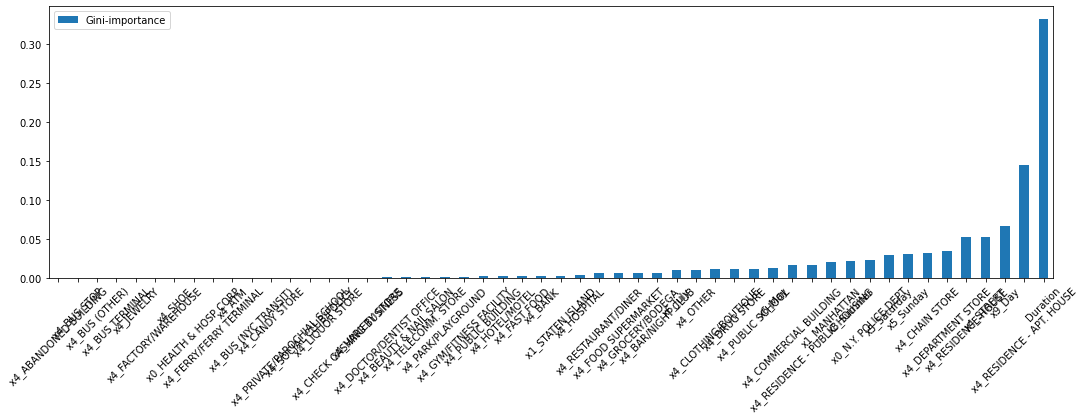

In [20]:
#get feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    #print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(figsize=(18,5),kind='bar', rot=45)

In [21]:
df_top_features = importances[importances['Gini-importance']>.0045]
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

C:\Users\BGaither\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gini-importance,feature
Duration,0.332102,Duration
x4_RESIDENCE - APT. HOUSE,0.144563,x4_RESIDENCE - APT. HOUSE
x9_Day,0.066849,x9_Day
x4_STREET,0.053301,x4_STREET
x4_RESIDENCE-HOUSE,0.052323,x4_RESIDENCE-HOUSE
x4_DEPARTMENT STORE,0.034229,x4_DEPARTMENT STORE
x4_CHAIN STORE,0.031796,x4_CHAIN STORE
x5_Sunday,0.031203,x5_Sunday
x5_Saturday,0.029664,x5_Saturday
x0_N.Y. POLICE DEPT,0.023708,x0_N.Y. POLICE DEPT


In [22]:
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78     58478
           1       0.77      0.78      0.78     58479

    accuracy                           0.78    116957
   macro avg       0.78      0.78      0.78    116957
weighted avg       0.78      0.78      0.78    116957



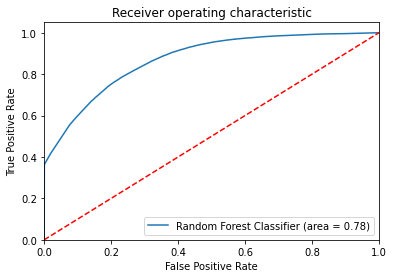

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [ ]:
df_train = pd.concat([X_train,y_train],axis=1)
df_train.head(5)

In [ ]:
df_train['y'].value_counts()

In [ ]:
source = df_train.groupby(['y']).agg(frequency=("x4_RESIDENCE - APT. HOUSE", "sum")).reset_index()

alt.Chart(source).mark_bar().encode(
    x='y:N',
    y='frequency:Q',
    color = 'y:N',
    tooltip = ['y:N','frequency:Q']
).properties(width=400,height=400,title="Distribution of x4_RESIDENCE - APT. HOUSE between classes")

In [ ]:
source = df_train.groupby(['y']).agg(frequency=("x9_Day", "sum")).reset_index()

alt.Chart(source).mark_bar().encode(
    x='y:N',
    y='frequency:Q',
    color = 'y:N',
    tooltip = ['y:N','frequency:Q']
).properties(width=400,height=400,title="Distribution of x9_Day between classes")

In [ ]:
source = df_train.groupby(['y']).agg(frequency=("x4_STREET", "sum")).reset_index()

alt.Chart(source).mark_bar().encode(
    x='y:N',
    y='frequency:Q',
    color = 'y:N',
    tooltip = ['y:N','frequency:Q']
).properties(width=400,height=400,title="Distribution of x4_STREET between classes")

In [ ]:
cut_labels_4 = ['Very Short', 'Short', 'Medium', 'Long']
cut_bins_4 = [-0.5,0.875,2.25,3.625,5]
tmp = df_train
tmp['dur_cut'] = pd.cut(tmp['Duration'],bins=cut_bins_4,labels=cut_labels_4)
source = tmp.groupby(['y','dur_cut']).agg(frequency=("Duration", "count")).reset_index()

alt.Chart(source).mark_bar().encode(
    x='dur_cut:N',
    y='frequency:Q',
    color = 'y:N',
    column='y:N',
    tooltip = ['y:N','frequency:Q']
).properties(width=400,height=400,title="Distribution of Duration")

## Grid Search

In [24]:
#Set up the parameters for grid search
parameters = {'n_estimators' : (10,30,50,70,90),
              'criterion' : ('gini','entropy'),
              'max_depth' : (3,5,7,9,10),
              'max_features' : ('auto','sqrt'),
              'min_samples_split' : (2,4,6)
             }

In [25]:
clf_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=False),param_grid=parameters,cv=3,verbose=True)

In [26]:
clf_grid_model = clf_grid.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 53.7min finished


In [27]:
clf_grid_model.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=90, n_jobs=-1)

In [28]:
clf_grid_model.best_score_

0.7662993671147879

In [29]:
clf = RandomForestClassifier(bootstrap=True,
                             class_weight=None,
                             criterion= 'gini',
                             max_depth= 10,
                             max_features= 'sqrt',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             min_samples_leaf=1,
                             min_samples_split= 4,
                             min_weight_fraction_leaf=0.0,
                             n_estimators= 90,
                             n_jobs=-1,
                             oob_score=False,
                             random_state=0,
                             verbose=0,
                             warm_start=False
                            )

In [30]:
clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=90, n_jobs=-1, random_state=0)

## Test the best model

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'Train Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Holdout Accuracy: {clf.score(X_holdout, y_holdout):.3f}')

Test Accuracy: 0.760
Train Accuracy: 0.762
Holdout Accuracy: 0.710


In [33]:
#classification report on y_test
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     58478
           1       0.75      0.79      0.77     58479

    accuracy                           0.76    116957
   macro avg       0.76      0.76      0.76    116957
weighted avg       0.76      0.76      0.76    116957



In [37]:
#classification report on y_holdout
y_pred_holdout = clf.predict(X_holdout)
print(classification_report(y_holdout,y_pred_holdout))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78     40568
           1       0.53      0.64      0.58     18196

    accuracy                           0.71     58764
   macro avg       0.67      0.69      0.68     58764
weighted avg       0.73      0.71      0.72     58764



<AxesSubplot:>

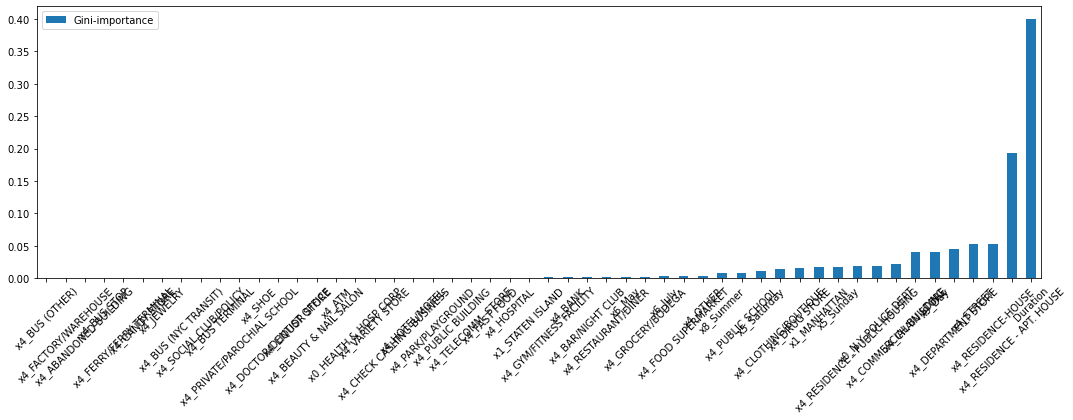

In [34]:
#get feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    #print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(figsize=(18,5),kind='bar', rot=45)

In [62]:
df_top_features = importances
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

,Gini-importance,feature
Duration,3.997351e-01,Duration
x4_RESIDENCE - APT. HOUSE,1.926876e-01,x4_RESIDENCE - APT. HOUSE
x4_RESIDENCE-HOUSE,5.314862e-02,x4_RESIDENCE-HOUSE
x4_STREET,5.211124e-02,x4_STREET
x4_DEPARTMENT STORE,4.564474e-02,x4_DEPARTMENT STORE
x9_Day,4.029747e-02,x9_Day
x4_CHAIN STORE,3.970352e-02,x4_CHAIN STORE
x4_COMMERCIAL BUILDING,2.127713e-02,x4_COMMERCIAL BUILDING
x0_N.Y. POLICE DEPT,1.942513e-02,x0_N.Y. POLICE DEPT
x4_RESIDENCE - PUBLIC HOUSING,1.871483e-02,x4_RESIDENCE - PUBLIC HOUSING


In [66]:
df_top_features.dtypes

Gini-importance    float64
feature             object
dtype: object

In [73]:
alt.Chart(df_top_features).mark_bar().encode(
    x=alt.Y('feature:N',sort='-y'),
    y='Gini-importance:Q',
    tooltip=['feature','Gini-importance']
).properties(title="Feature Importance")

alt.Chart(...)

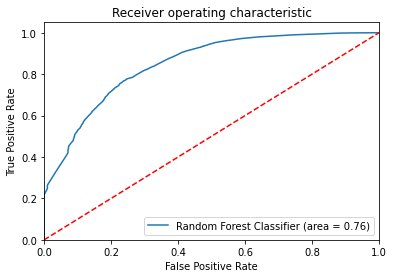

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

## find the best threshold

In [40]:
def getThreshold(y_test, probs, pos_label):
    probs = probs.T[1]
    actual = np.array([y_test == pos_label]).astype(int)[0]
    resultsdf = pd.DataFrame(data = {'Actual':actual, 'Probability':probs})
    tplist = []
    tnlist = []
    fplist = []
    fnlist = []
    threshlist = []
    for thresh in np.linspace(0,1,num=51):
        y_pred = probs > thresh
        tplist.append((resultsdf['Actual'] * y_pred).sum())
        tnlist.append(((1 - resultsdf['Actual']) * (1 - y_pred)).sum())
        fplist.append(((1 - resultsdf['Actual']) * y_pred).sum())
        fnlist.append((resultsdf['Actual'] * (1 - y_pred)).sum())
        threshlist.append(thresh)
    accdf = pd.DataFrame(data = {'Threshold':threshlist, 'TP':tplist, 'TN':tnlist, 'FP':fplist, 'FN':fnlist})
    accdf['Accuracy'] = (accdf['TP'] + accdf['TN']) / (accdf['TP'] + accdf['FP'] + accdf['TN'] + accdf['FN'])
    accdf['Precision'] = accdf['TP'] / (accdf['TP'] + accdf['FP'])
    accdf['Recall / Sensitivity'] = accdf['TP'] / (accdf['TP'] + accdf['FN'])
    accdf['Specificity'] = accdf['TN'] / (accdf['TN'] + accdf['TP'])
    accdf['F1'] = 2*((accdf['Precision'] * accdf['Recall / Sensitivity']) / (accdf['Precision'] + accdf['Recall / Sensitivity']))
    return accdf

In [41]:
accdf = getThreshold(y_test,clf.predict_proba(X_test),pos_label=1)
accdf

,Threshold,TP,TN,FP,FN,Accuracy,Precision,Recall / Sensitivity,Specificity,F1
0,0.00,58479,0,58478,0,0.500004,0.500004,1.000000,0.000000,0.666670
1,0.02,58479,0,58478,0,0.500004,0.500004,1.000000,0.000000,0.666670
2,0.04,58479,0,58478,0,0.500004,0.500004,1.000000,0.000000,0.666670
3,0.06,58479,19,58459,0,0.500167,0.500086,1.000000,0.000325,0.666743
4,0.08,58479,295,58183,0,0.502527,0.501269,1.000000,0.005019,0.667793
5,0.10,58466,948,57530,13,0.507999,0.504035,0.999778,0.015956,0.670193
6,0.12,58370,6737,51741,109,0.556675,0.530101,0.998136,0.103476,0.692449
7,0.14,58296,8199,50279,183,0.568542,0.536919,0.996871,0.123303,0.697930
8,0.16,58162,9789,48689,317,0.580991,0.544328,0.994579,0.144060,0.703587
9,0.18,58014,12654,45824,465,0.604222,0.558697,0.992048,0.179063,0.714823


## Using the selected threshold, evaluate test set score

In [54]:
#.60 threshold has highest precision and accuracy
proba = clf.predict_proba(X_test)
threshold_predict = np.where(proba[:,1] > .6,1,0)
threshold_predict

array([0, 0, 0, ..., 0, 0, 1])

In [55]:
#classification report on y_test
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,threshold_predict))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77     58478
           1       0.80      0.64      0.71     58479

    accuracy                           0.74    116957
   macro avg       0.75      0.74      0.74    116957
weighted avg       0.75      0.74      0.74    116957



## Evaluate threshold on holdout set

In [59]:
accdf = getThreshold(y_holdout,clf.predict_proba(X_holdout),pos_label=1)
accdf

,Threshold,TP,TN,FP,FN,Accuracy,Precision,Recall / Sensitivity,Specificity,F1
0,0.00,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
1,0.02,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
2,0.04,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
3,0.06,18196,10,40558,0,0.309816,0.309698,1.000000,0.000549,0.472930
4,0.08,18195,212,40356,1,0.313236,0.310755,0.999945,0.011517,0.474155
5,0.10,18185,698,39870,11,0.321336,0.313237,0.999395,0.036964,0.476977
6,0.12,18118,4676,35892,78,0.387891,0.335456,0.995713,0.205142,0.501842
7,0.14,18066,5627,34941,130,0.403189,0.340823,0.992856,0.237496,0.507451
8,0.16,17996,6691,33877,200,0.420104,0.346924,0.989009,0.271033,0.513665
9,0.18,17906,8652,31916,290,0.451943,0.359399,0.984062,0.325778,0.526508


In [93]:
source = accdf
source['opt'] = .54

base = alt.Chart(source)

#red
acc= base.mark_line(color="#fc030f").encode(
    x='Threshold:Q',
    y='Accuracy:Q'
)
#green
prec = base.mark_line(color="#136e1a").encode(
    x='Threshold:Q',
    y='Precision:Q'
)
#blue
rec = base.mark_line(color="#3a3b9c").encode(
    x='Threshold:Q',
    y='Recall / Sensitivity:Q'
)
#orange
spec = base.mark_line(color="#ebac00").encode(
    x='Threshold:Q',
    y='Specificity:Q'
)

optimal = base.mark_rule().encode(
    x='opt'
)
acc+prec+rec+spec+optimal

alt.LayerChart(...)

In [74]:
#.54 threshold has highest precision, recall and accuracy
proba = clf.predict_proba(X_holdout)
threshold_predict = np.where(proba[:,1] > 0.54,1,0)
threshold_predict

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
#classification report on y_test
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_holdout,threshold_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     40568
           1       0.55      0.56      0.56     18196

    accuracy                           0.72     58764
   macro avg       0.68      0.68      0.68     58764
weighted avg       0.73      0.72      0.72     58764

